In [1]:
#dependencies & Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from weather_api_SALR import weather_api_SALR

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate Cities List
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
#url for api call
api_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_SALR

#city data list

cities_data = []


#print start of api call
print('Starting API Call')
print('-----------------')

#counters for number of cities

group_count = 1
add_count = 1

for city in cities:
    
    time.sleep(1.2)
    
    if (group_count % 50 == 0) and (group_count >= 50):
        
        add_count += 1
        group_count = 0
        
    #url for every city
    
    cities_url = api_url + '&q=' + city
    
    print('API record set %s # %s | %s' % (add_count, group_count, city))
    
    #new group number
    group_count += 1
    
    try:

        cities_weather = requests.get(cities_url).json()
    
        cities_clouds = cities_weather["clouds"]["all"]
        cities_country = cities_weather["sys"]["country"]
        city_date = cities_weather["dt"]
        cities_high_temp = cities_weather["main"]["temp_max"]
        cities_humidity = cities_weather["main"]["humidity"]
        cities_latitude = cities_weather["coord"]["lat"]
        cities_longitude = cities_weather["coord"]["lon"]
        cities_wind = cities_weather["wind"]["speed"]

        cities_data.append({'city': city,
                            'clouds': cities_clouds,
                            'country': cities_country,
                            'date': city_date,
                            'high_temp': cities_high_temp,
                            'humidity': cities_humidity,
                            'latitude': cities_latitude,
                            'longitude': cities_longitude,
                            'wind': cities_wind})
        
        print(cities_country)

    except:
        print('Error. City data not found. Next city. . .')
        pass

#api call done
print('---------------------' + '\n' + '| Finished API Call |' + '\n' + '---------------------')

Starting API Call
-----------------
API record set 1 # 1 | vaini
TO
API record set 1 # 2 | chapais
CA
API record set 1 # 3 | petropavlovsk-kamchatskiy
RU
API record set 1 # 4 | bilma
NE
API record set 1 # 5 | ushuaia
AR
API record set 1 # 6 | samusu
Error. City data not found. Next city. . .
API record set 1 # 7 | altamont
US
API record set 1 # 8 | mareeba
AU
API record set 1 # 9 | busselton
AU
API record set 1 # 10 | pemangkat
ID
API record set 1 # 11 | samarai
PG
API record set 1 # 12 | kapaa
US
API record set 1 # 13 | khatanga
RU
API record set 1 # 14 | grand river south east
Error. City data not found. Next city. . .
API record set 1 # 15 | rikitea
PF
API record set 1 # 16 | bluff
NZ
API record set 1 # 17 | salgotarjan
HU
API record set 1 # 18 | key west
US
API record set 1 # 19 | port alfred
ZA
API record set 1 # 20 | sao filipe
CV
API record set 1 # 21 | plouzane
FR
API record set 1 # 22 | wewak
PG
API record set 1 # 23 | san blas
MX
API record set 1 # 24 | iqaluit
CA
API record 

API record set 5 # 4 | mincivan
AZ
API record set 5 # 5 | soyo
AO
API record set 5 # 6 | goba
ET
API record set 5 # 7 | cururupu
BR
API record set 5 # 8 | raudeberg
NO
API record set 5 # 9 | zainsk
RU
API record set 5 # 10 | pangani
TZ
API record set 5 # 11 | upernavik
GL
API record set 5 # 12 | port hedland
AU
API record set 5 # 13 | saint george
US
API record set 5 # 14 | sao joao da barra
BR
API record set 5 # 15 | viedma
AR
API record set 5 # 16 | hailar
CN
API record set 5 # 17 | georgetown
MY
API record set 5 # 18 | egvekinot
RU
API record set 5 # 19 | yeppoon
AU
API record set 5 # 20 | fare
PF
API record set 5 # 21 | palabuhanratu
Error. City data not found. Next city. . .
API record set 5 # 22 | amderma
Error. City data not found. Next city. . .
API record set 5 # 23 | poum
NC
API record set 5 # 24 | puerto del rosario
ES
API record set 5 # 25 | kijang
KR
API record set 5 # 26 | esperantina
BR
API record set 5 # 27 | pozo colorado
PY
API record set 5 # 28 | grandola
PT
API reco

API record set 9 # 14 | isla del bosque
MX
API record set 9 # 15 | xai-xai
MZ
API record set 9 # 16 | novaya ladoga
RU
API record set 9 # 17 | marsaxlokk
MT
API record set 9 # 18 | khambhat
IN
API record set 9 # 19 | zhanaozen
KZ
API record set 9 # 20 | paamiut
GL
API record set 9 # 21 | fukue
JP
API record set 9 # 22 | tidore
Error. City data not found. Next city. . .
API record set 9 # 23 | lashio
MM
API record set 9 # 24 | agua verde
MX
API record set 9 # 25 | khuzhir
RU
API record set 9 # 26 | tucurui
BR
API record set 9 # 27 | aykhal
RU
API record set 9 # 28 | yeniseysk
RU
API record set 9 # 29 | quilmana
PE
API record set 9 # 30 | lebu
CL
API record set 9 # 31 | san cristobal
VE
API record set 9 # 32 | labutta
Error. City data not found. Next city. . .
API record set 9 # 33 | angoche
MZ
API record set 9 # 34 | smila
UA
API record set 9 # 35 | gao
ML
API record set 9 # 36 | kaliganj
BD
API record set 9 # 37 | buala
SB
API record set 9 # 38 | jawhar
SO
API record set 9 # 39 | port 

In [4]:
cities_data

[{'city': 'vaini',
  'clouds': 75,
  'country': 'TO',
  'date': 1586136763,
  'high_temp': 82.4,
  'humidity': 65,
  'latitude': -21.2,
  'longitude': -175.2,
  'wind': 8.05},
 {'city': 'chapais',
  'clouds': 90,
  'country': 'CA',
  'date': 1586136837,
  'high_temp': 26.6,
  'humidity': 79,
  'latitude': 49.78,
  'longitude': -74.85,
  'wind': 12.75},
 {'city': 'petropavlovsk-kamchatskiy',
  'clouds': 0,
  'country': 'RU',
  'date': 1586136838,
  'high_temp': 37.4,
  'humidity': 34,
  'latitude': 53.05,
  'longitude': 158.65,
  'wind': 6.71},
 {'city': 'bilma',
  'clouds': 0,
  'country': 'NE',
  'date': 1586136840,
  'high_temp': 80.8,
  'humidity': 13,
  'latitude': 18.69,
  'longitude': 12.92,
  'wind': 9.28},
 {'city': 'ushuaia',
  'clouds': 40,
  'country': 'AR',
  'date': 1586136718,
  'high_temp': 39.2,
  'humidity': 80,
  'latitude': -54.8,
  'longitude': -68.3,
  'wind': 18.34},
 {'city': 'altamont',
  'clouds': 1,
  'country': 'US',
  'date': 1586136843,
  'high_temp': 44.01

In [5]:
cities_data_df = pd.DataFrame()

In [6]:
cities_data_df = pd.DataFrame.from_dict(cities_data, orient='columns')

In [7]:
cities_data_df

,city,clouds,country,date,high_temp,humidity,latitude,longitude,wind
0,vaini,75,TO,1586136763,82.40,65,-21.20,-175.20,8.05
1,chapais,90,CA,1586136837,26.60,79,49.78,-74.85,12.75
2,petropavlovsk-kamchatskiy,0,RU,1586136838,37.40,34,53.05,158.65,6.71
3,bilma,0,NE,1586136840,80.80,13,18.69,12.92,9.28
4,ushuaia,40,AR,1586136718,39.20,80,-54.80,-68.30,18.34
...,...,...,...,...,...,...,...,...,...
576,yatou,100,CN,1586137621,52.09,51,37.15,122.38,8.12
577,maneadero,72,MX,1586137623,59.00,76,31.72,-116.57,4.00
578,caravelas,25,BR,1586137624,77.40,80,-17.71,-39.25,10.56
579,rafaela,17,AR,1586137625,71.01,55,-31.25,-61.49,5.17


In [8]:
#save so i can go to bed its 2:24am lmao. finish tomorrow
cities_data_df.to_csv('cities_data_df.csv', index = False, header=True)

In [9]:
cities_data_df.head()

,city,clouds,country,date,high_temp,humidity,latitude,longitude,wind
0,vaini,75,TO,1586136763,82.4,65,-21.20,-175.20,8.05
1,chapais,90,CA,1586136837,26.6,79,49.78,-74.85,12.75
2,petropavlovsk-kamchatskiy,0,RU,1586136838,37.4,34,53.05,158.65,6.71
3,bilma,0,NE,1586136840,80.8,13,18.69,12.92,9.28
4,ushuaia,40,AR,1586136718,39.2,80,-54.80,-68.30,18.34


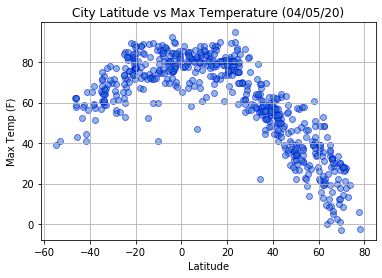

In [10]:
#plot 1: latitude vs temperature

plt.scatter(cities_data_df['latitude'], cities_data_df['high_temp'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_temp.png')

plt.show()

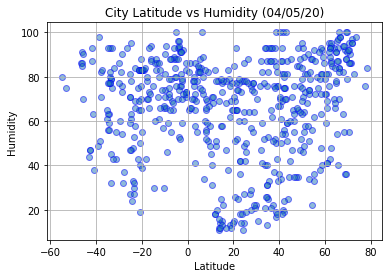

In [110]:
#plot 2: Latitude & Humidity

plt.scatter(cities_data_df['latitude'], cities_data_df['humidity'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_humidity.png')

plt.show()

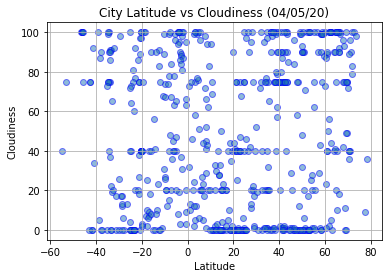

In [111]:
#plot 3: latitude vs cloudiness

plt.scatter(cities_data_df['latitude'], cities_data_df['clouds'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_clouds.png')

plt.show()

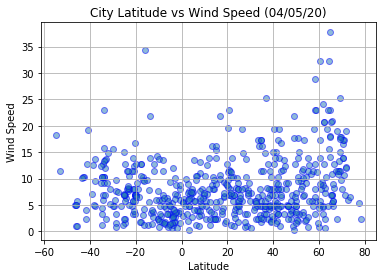

In [112]:
#plot 4: latitude vs wind speed

plt.scatter(cities_data_df['latitude'], cities_data_df['wind'], edgecolor='blue', marker='o', alpha=.5)

plt.title('City Latitude vs Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('City_lat_vs_wind.png')

plt.show()

In [113]:
#make the linear regression function - did this in group project :)

def linreg_plot(x_val, y_val, title, coord):
    
    (slope, intercept, rval, pval, stderr) = linregress(x_val, y_val)
    reg_val = x_val * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line_eq, coord, fontsize=12, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared value is {rval}")
    plt.show()

In [114]:
#north & southern hem
north_hem_df = cities_data_df.loc[(cities_data_df['latitude'] > 0)]
south_hem_df = cities_data_df.loc[(cities_data_df['latitude'] < 0)]

The r-squared value is -0.8968351957915556


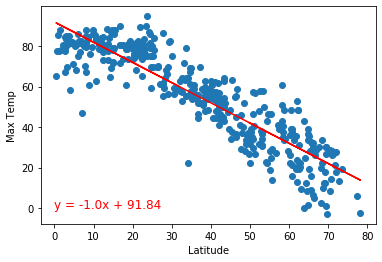

In [115]:
#max temp lin reg (north)
x_val = north_hem_df['latitude']
y_val = north_hem_df['high_temp']
linreg_plot(x_val, y_val, 'Max Temp', (0,0))

The r-squared value is 0.6574115358596779


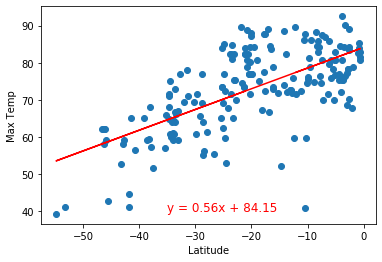

In [116]:
#max temp lin reg (south)
x_val = south_hem_df['latitude']
y_val = south_hem_df['high_temp']
linreg_plot(x_val, y_val, 'Max Temp', (-35,40))

The r-squared value is 0.29042489309878944


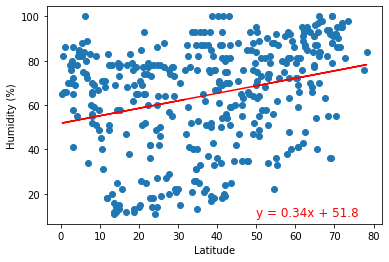

In [117]:
#humidity linreg (north)
x_val = north_hem_df['latitude']
y_val = north_hem_df['humidity']
linreg_plot(x_val, y_val, 'Humidity (%)', (50,10))

The r-squared value is 0.1779134534820981


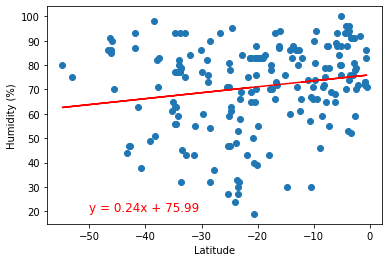

In [118]:
#humidity linreg (south)
x_val = south_hem_df['latitude']
y_val = south_hem_df['humidity']
linreg_plot(x_val, y_val, 'Humidity (%)', (-50,20))

The r-squared value is 0.2755278646878475


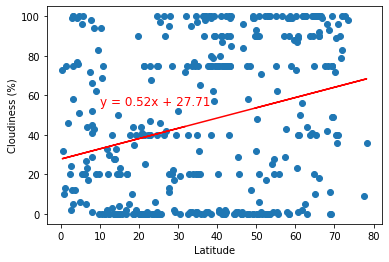

In [119]:
#cloudiness linreg (north)
x_val = north_hem_df['latitude']
y_val = north_hem_df['clouds']
linreg_plot(x_val, y_val, 'Cloudiness (%)', (10,55))

The r-squared value is 0.050089172149038075


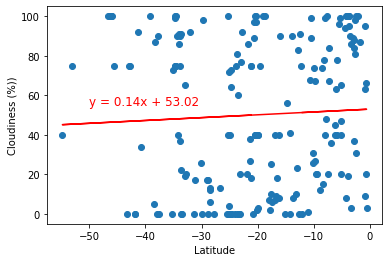

In [120]:
#cloudines linreg (south)
x_val = south_hem_df['latitude']
y_val = south_hem_df['clouds']
linreg_plot(x_val, y_val, 'Cloudiness (%))', (-50,55))

The r-squared value is 0.29635395080282195


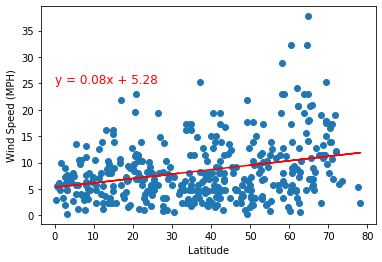

In [121]:
#wind linreg (north)
x_val = north_hem_df['latitude']
y_val = north_hem_df['wind']
linreg_plot(x_val, y_val, 'Wind Speed (MPH)', (0,25))

The r-squared value is -0.28946701409285064


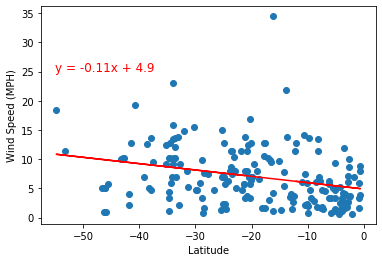

In [122]:
#wind linreg (south)
x_val = south_hem_df['latitude']
y_val = south_hem_df['wind']
linreg_plot(x_val, y_val, 'Wind Speed (MPH)', (-55,25))